In [ ]:
import pandas as pd

# تحميل البيانات من CSV
df = pd.read_csv("etsy_data.csv")

# عرض أول 5 صفوف للتأكد
df.head()


,title,price,url
0,ADHD Digital Planner (made by an ADHDer) for i...,17.17,https://www.etsy.com/listing/1282376971/adhd-d...
1,Digital Planner 2025 Customizable WHOLE SHOP B...,19.77,https://www.etsy.com/listing/1602251608/digita...
2,Ultimate Life Planner | ADHD Productivity Plan...,9.60,https://www.etsy.com/listing/1886836083/ultima...
3,"Digital Planner Undated, Minimalist Planner, I...",7.50,https://www.etsy.com/listing/4300760804/digita...
4,"2025 2026 Premium Digital Planner, Undated Ult...",3.88,https://www.etsy.com/listing/1779854716/2025-2...


In [ ]:
# إزالة الصفوف التي تحتوي على قيم ناقصة
df.dropna(inplace=True)

# إزالة التكرارات
df.drop_duplicates(inplace=True)

# تحويل السعر إلى رقم (تأكد أن السعر لا يحتوي على رموز غير رقمية)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['price'], inplace=True)


In [ ]:
print("عدد المنتجات:", len(df))
print("متوسط السعر:", df['price'].mean())
print("أعلى سعر:", df['price'].max())
print("أقل سعر:", df['price'].min())


عدد المنتجات: 60
متوسط السعر: 8.633000000000001
أعلى سعر: 35.14
أقل سعر: 0.05


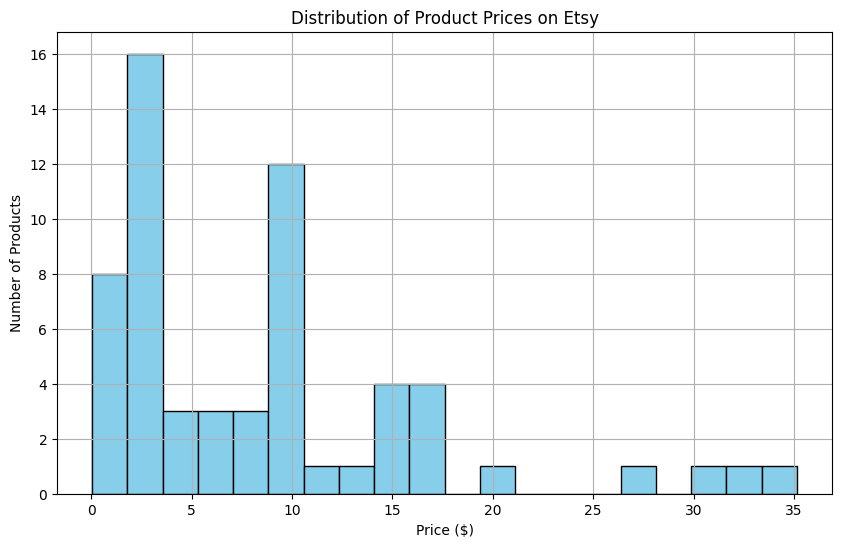

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Product Prices on Etsy")
plt.xlabel("Price ($)")
plt.ylabel("Number of Products")
plt.grid(True)
plt.show()


In [ ]:
import re
from collections import Counter


In [ ]:
# تحويل جميع العناوين إلى lowercase
titles = df['title'].dropna().str.lower()

# استخراج الكلمات من العناوين
all_words = []

for title in titles:
    words = re.findall(r'\b[a-zA-Z0-9\-]+\b', title)  # استخراج الكلمات فقط
    all_words.extend(words)

print("عدد الكلمات الإجمالي:", len(all_words))


عدد الكلمات الإجمالي: 1017


In [ ]:
stop_words = set([
    'the', 'and', 'for', 'with', 'a', 'an', 'of', 'to', 'in', 'on', '2023', '2024', '2025', '2026', '2027',
    'digital', 'planner', 'printable', 'pdf', 'instant', 'download', 'weekly', 'monthly'
])

filtered_words = [word for word in all_words if word not in stop_words and len(word) > 2]


In [ ]:
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)  # أكثر 20 كلمة

# عرض النتائج
for word, count in common_words:
    print(f"{word}: {count}")


goodnotes: 42
ipad: 36
daily: 33
notability: 22
undated: 21
journal: 16
adhd: 15
template: 10
life: 10
minimalist: 10
android: 9
ultimate: 9
dated: 9
calendar: 8
bundle: 6
girl: 6
notion: 6
all-in-one: 5
all: 5
one: 5


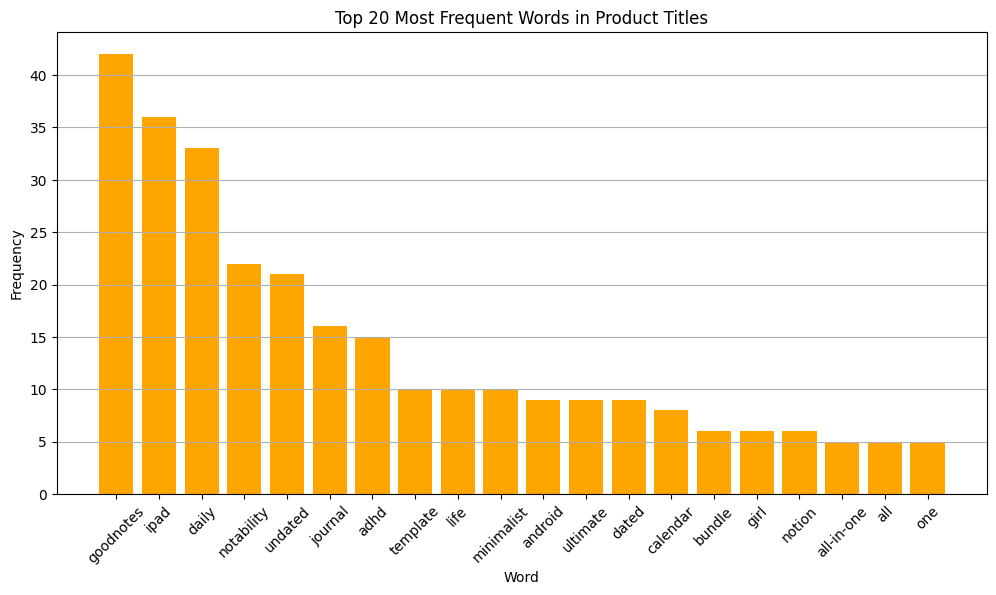

In [ ]:
words, counts = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='orange')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Product Titles")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()
